# Classifier mit Hauptkomponenten

**Inhalt:** 
- SMVC
- RandomForestRegressor
- KNNC
- Neuronales Netz \
Die Modelle wurden mit den statischen Lage- und Streuungsparameter erstellt.


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
from help_functions import load_stat_feature_pca

# SMVC

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       1.00      1.00      1.00        22
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





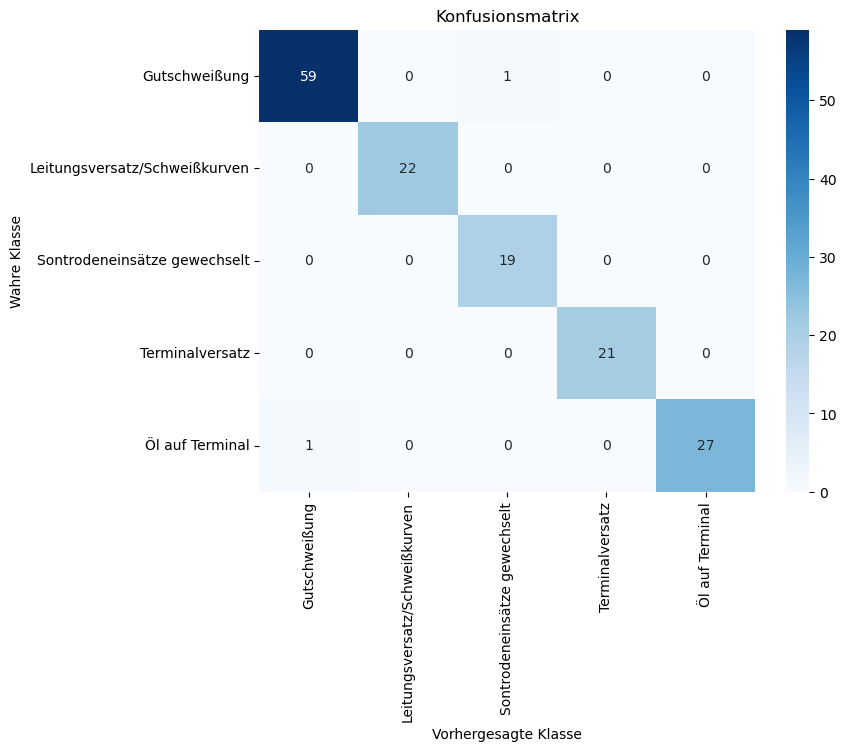

Beste Parameter: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [2]:
loader = load_stat_feature_pca(n_components=3)

x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svc = SVC()
grid_search = GridSearchCV(
    estimator=svc, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loader.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





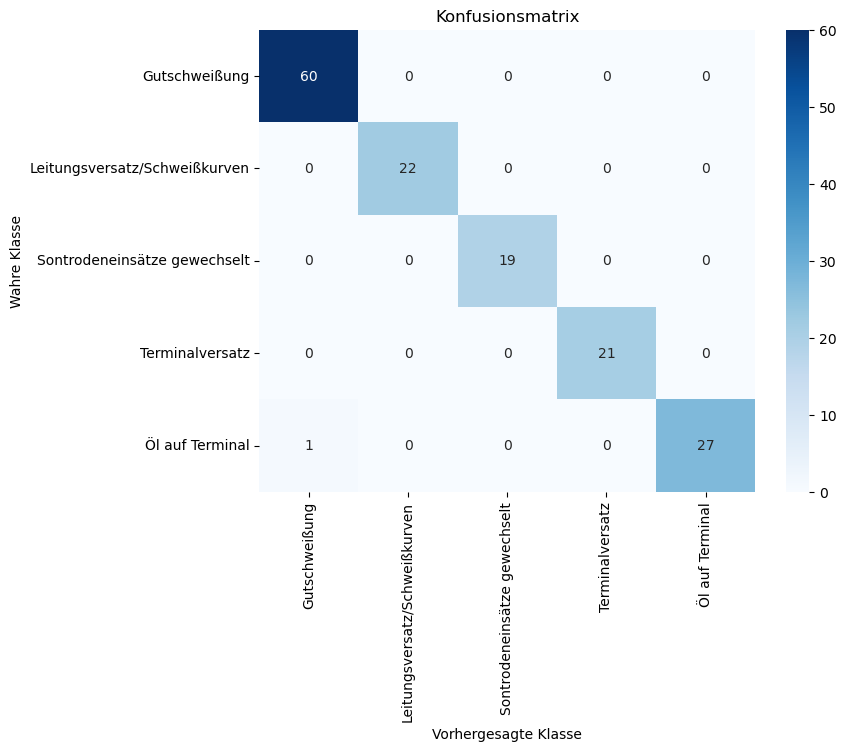

Beste Parameter: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [3]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()


param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svc = SVC()
grid_search = GridSearchCV(
    estimator=svc, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loader.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)

# RandomForestClassifier

Fitting 5 folds for each of 162 candidates, totalling 810 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





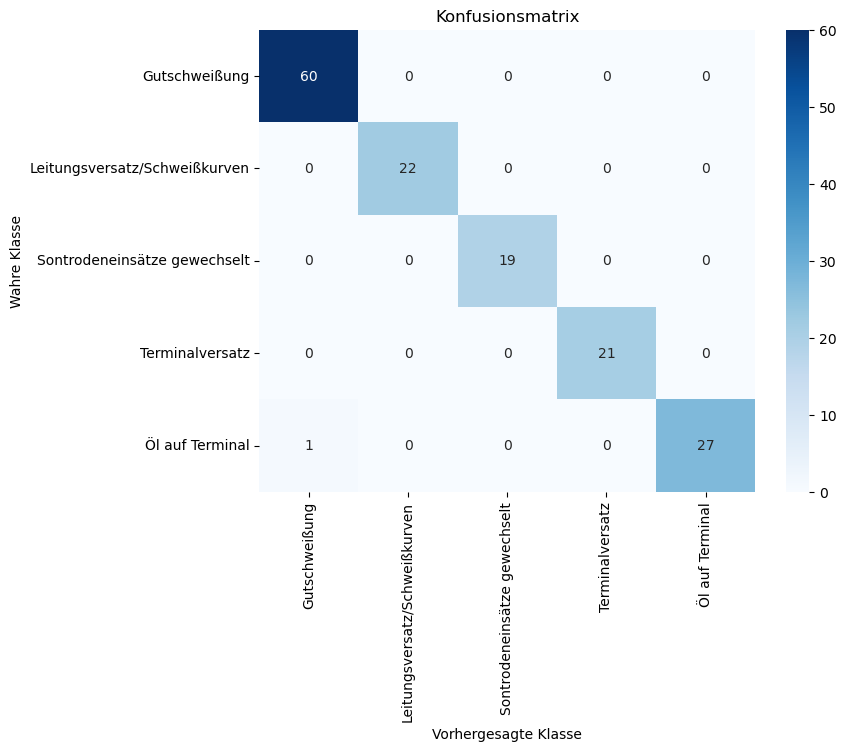

Beste Parameter: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [4]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()


param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loader.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)

# KNeighborsClassifier

Fitting 5 folds for each of 16 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        21
           4       1.00      0.96      0.98        28

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150





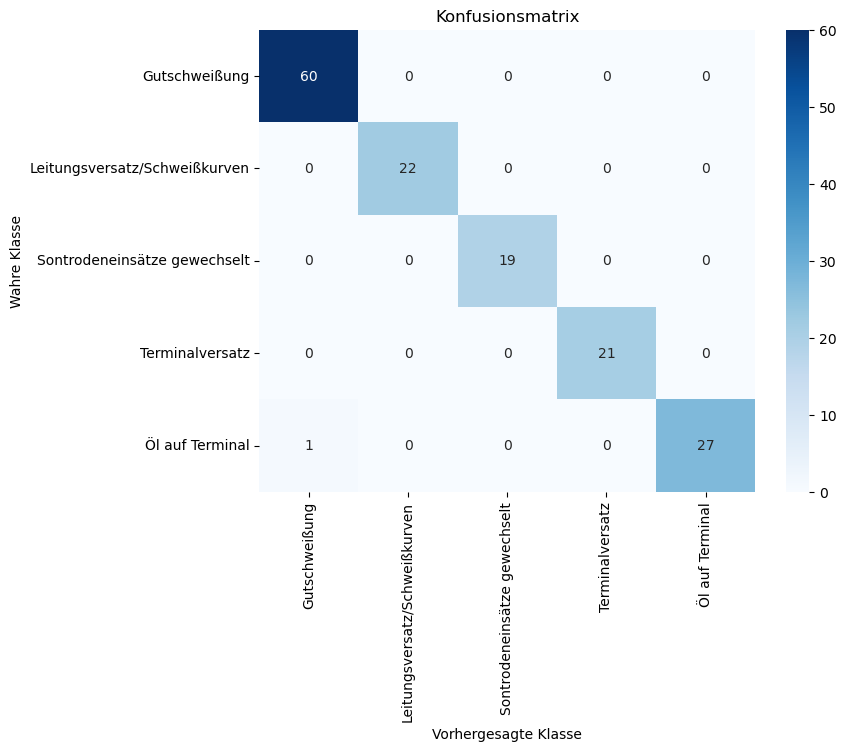

Beste Parameter: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


In [5]:
loader = load_stat_feature_pca(n_components=4)

x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()

param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)
loader.confusionmatrix(y_test, y_pred)
print("Beste Parameter:", best_params)

# Neuronale Netze

Trial 90 Complete [00h 00m 02s]
val_accuracy: 0.9666666388511658

Best val_accuracy So Far: 0.9777777791023254
Total elapsed time: 00h 01m 16s
Beste Hyperparameter: {'units_layer1': 96, 'dropout_rate_layer1': 0.0, 'units_layer2': 32, 'dropout_rate_layer2': 0.1, 'optimizer': 'adam', 'tuner/epochs': 17, 'tuner/initial_epoch': 6, 'tuner/bracket': 3, 'tuner/round': 2, 'tuner/trial_id': '0036'}
Epoch 1/50
12/12 [==============================] - 0s 8ms/step - loss: 1.4957 - accuracy: 0.2972 - val_loss: 1.2153 - val_accuracy: 0.6111
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 1.0807 - accuracy: 0.6444 - val_loss: 0.9232 - val_accuracy: 0.7444
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.8170 - accuracy: 0.8472 - val_loss: 0.7262 - val_accuracy: 0.9556
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.9417 - val_loss: 0.5833 - val_accuracy: 0.9556
Epoch 5/50
12/12 [=============================

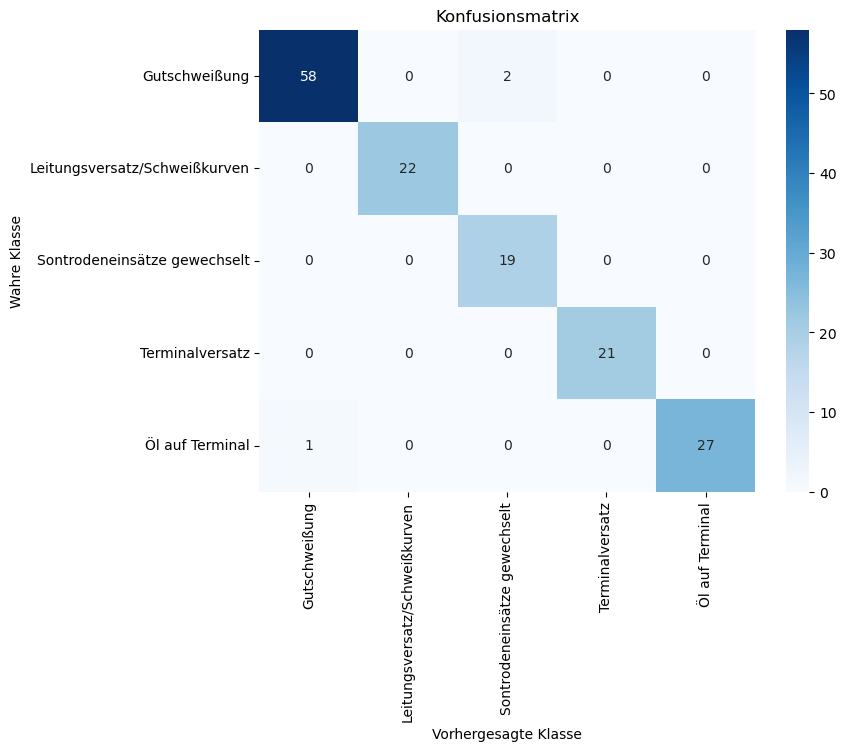

In [1]:
import os
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from help_functions import load_stat_feature_pca

# GPU deaktivieren (falls erforderlich)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Daten laden
loader = load_stat_feature_pca(n_components=4)
x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()


# Modell-Erstellungsfunktion für KerasTuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    model.add(
        Dense(
            units=hp.Int("units_layer1", min_value=32, max_value=128, step=32),
            activation="relu",
        )
    )
    model.add(
        Dropout(
            rate=hp.Float("dropout_rate_layer1", min_value=0.0, max_value=0.5, step=0.1)
        )
    )
    model.add(
        Dense(
            units=hp.Int("units_layer2", min_value=16, max_value=64, step=16),
            activation="relu",
        )
    )
    model.add(
        Dropout(
            rate=hp.Float("dropout_rate_layer2", min_value=0.0, max_value=0.5, step=0.1)
        )
    )
    model.add(Dense(len(set(y_train)), activation="softmax"))

    optimizer = hp.Choice("optimizer", values=["adam", "rmsprop"])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# KerasTuner: Hyperband-Strategie
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=50,
    factor=3,
    directory="tuner_results",
    project_name="hyperparameter_tuning",
)

# EarlyStopping-Callback
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Tuning starten
tuner.search(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

# Beste Hyperparameter abrufen
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Beste Hyperparameter: {best_hps.values}")

# Modell mit den besten Hyperparametern trainieren
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(
    x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping]
)

# Vorhersagen auf Testdaten
y_pred = best_model.predict(x_test).argmax(axis=1)


loader.confusionmatrix(y_test, y_pred)

Reloading Tuner from tuner_results/hyperparameter_tuning/tuner0.json
Beste Hyperparameter: {'units_layer1': 128, 'dropout_rate_layer1': 0.4, 'units_layer2': 32, 'dropout_rate_layer2': 0.0, 'optimizer': 'adam', 'tuner/epochs': 17, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
Epoch 1/50
12/12 [==============================] - 0s 9ms/step - loss: 1.4651 - accuracy: 0.3889 - val_loss: 1.1022 - val_accuracy: 0.8556
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9896 - accuracy: 0.7806 - val_loss: 0.7919 - val_accuracy: 0.9333
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7148 - accuracy: 0.8972 - val_loss: 0.5820 - val_accuracy: 0.9333
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.8917 - val_loss: 0.4316 - val_accuracy: 0.9333
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.9083 - val_loss: 0.3286 - val_accuracy: 0.9444
Epoch 

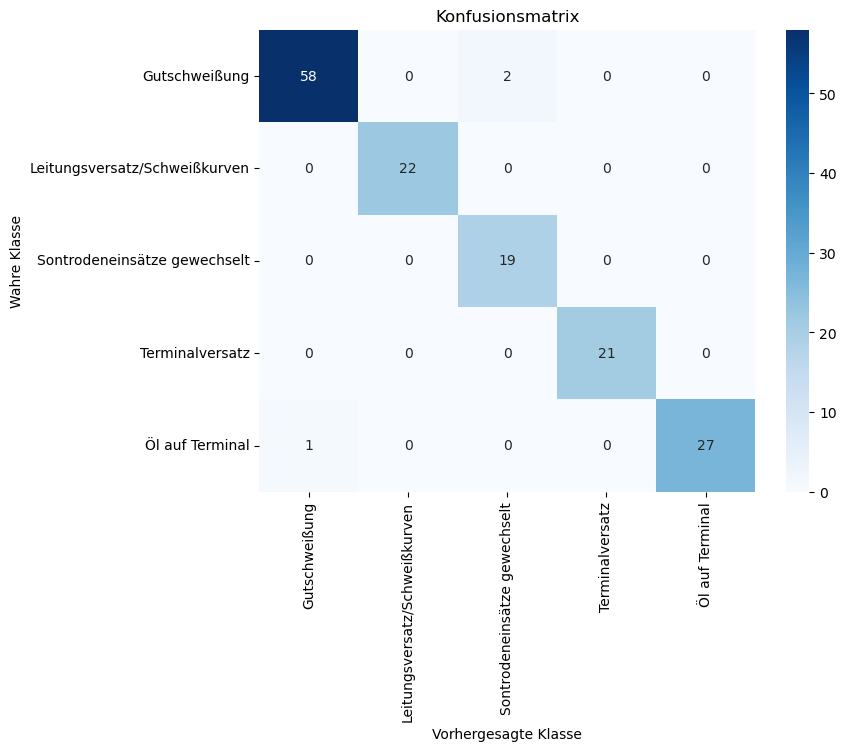

In [2]:
import os
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from help_functions import load_stat_feature_pca

# GPU deaktivieren (falls erforderlich)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Daten laden
loader = load_stat_feature_pca(n_components=3)
x_train, x_test, y_train, y_test = loader.load_and_split_classification_data()


# Modell-Erstellungsfunktion für KerasTuner
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    model.add(
        Dense(
            units=hp.Int("units_layer1", min_value=32, max_value=128, step=32),
            activation="relu",
        )
    )
    model.add(
        Dropout(
            rate=hp.Float("dropout_rate_layer1", min_value=0.0, max_value=0.5, step=0.1)
        )
    )
    model.add(
        Dense(
            units=hp.Int("units_layer2", min_value=16, max_value=64, step=16),
            activation="relu",
        )
    )
    model.add(
        Dropout(
            rate=hp.Float("dropout_rate_layer2", min_value=0.0, max_value=0.5, step=0.1)
        )
    )
    model.add(Dense(len(set(y_train)), activation="softmax"))

    optimizer = hp.Choice("optimizer", values=["adam", "rmsprop"])
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# KerasTuner: Hyperband-Strategie
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=50,
    factor=3,
    directory="tuner_results",
    project_name="hyperparameter_tuning",
)

# EarlyStopping-Callback
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# Tuning starten
tuner.search(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1,
)

# Beste Hyperparameter abrufen
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Beste Hyperparameter: {best_hps.values}")

# Modell mit den besten Hyperparametern trainieren
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(
    x_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping]
)

# Vorhersagen auf Testdaten
y_pred = best_model.predict(x_test).argmax(axis=1)


loader.confusionmatrix(y_test, y_pred)